#Data import

In [90]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import color
from skimage import io

In [89]:
import os
import urllib.request
class DataFetch(object): 
  def __init__(self):
    self.DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Barcelona-Technology-School/InnoSpark-edir/main/"
  
  def fetch_csv(self, folder, file_name):
    
      if not os.path.isdir(folder):
        os.makedirs(folder)
      csv_path = os.path.join(folder,file_name)
      URL = self.DOWNLOAD_ROOT + folder + file_name
      urllib.request.urlretrieve(URL, csv_path)

      return csv_path

  def fetch_data(self, folder, file_names):
    if not os.path.isdir(folder):
        os.makedirs(folder)

    for file_name in tqdm(file_names):
      URL= self.DOWNLOAD_ROOT + folder + file_name
      file_path = os.path.join(folder,file_name)

      try:
        urllib.request.urlretrieve(URL, file_path)
      except:
        continue
      

##Kaggle 

https://www.kaggle.com/andrewmvd/ocular-disease-recognition-odir5k

In [39]:
#! rm -r "ML first attempt"

In [45]:
folder='Datasets/Kaggle/'
file_name = 'full_df.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [46]:
df = pd.read_csv(csv_path)

In [47]:
df_gl=df.copy()
df_ct=df.copy()

In [48]:
def has_glaucoma(text):
    if "glauc" in text:
        return 1
    else:
        return 0

In [49]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [50]:
df_gl["left_glau"] = df_gl["Left-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df_gl["right_glau"] = df_gl["Right-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df_ct["left_cat"] = df_ct["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df_ct["right_cat"] = df_ct["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [51]:
left_glau = df_gl.loc[(df_gl.G ==1) & (df_gl.left_glau == 1)]["Left-Fundus"].values
right_glau = df_gl.loc[(df_gl.G ==1) & (df_gl.right_glau == 1)]["Right-Fundus"].values
left_cat = df_ct.loc[(df_ct.C ==1) & (df_ct.left_cat == 1)]["Left-Fundus"].values
right_cat = df_ct.loc[(df_ct.C ==1) & (df_ct.right_cat == 1)]["Right-Fundus"].values

In [52]:
print(left_glau.shape)
print(right_glau.shape)
print(left_cat.shape)
print(right_cat.shape)

(332,)
(284,)
(304,)
(290,)


In [53]:
glau_file_names = np.concatenate((left_glau,right_glau),axis=0)
print(glau_file_names.shape)
cat_file_names = np.concatenate((left_cat,right_cat),axis=0)
print(cat_file_names.shape)

(616,)
(594,)


In [17]:
glau_file_names[0]

'95_left.jpg'

In [59]:
folder='Datasets/Kaggle/preprocessed_images/'
DataFetch().fetch_data(folder,glau_file_names)

100%|██████████| 616/616 [00:00<00:00, 99178.20it/s]

https://raw.githubusercontent.com/Barcelona-Technology-School/InnoSpark-edir/main/Datasets/Kaggle/preprocessed_images/2063_right.jpg
Datasets/Kaggle/preprocessed_images/2063_right.jpg


In [21]:
DataFetch().fetch_data(folder, cat_file_names)

100%|██████████| 594/594 [01:12<00:00,  8.14it/s]


##ORIGA

In [62]:
folder='Datasets/ORIGA/'
file_name = 'imgNamesORIGA.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [129]:
csv_path

'datasets/ORIGA/imgNamesORIGA.csv'

In [63]:
df = pd.read_csv(csv_path)

In [64]:
df.head()

,Unnamed: 0,Original names,New names
0,0,001.jpg,Im0001_ORIGA.jpg
1,1,002.jpg,Im0002_ORIGA.jpg
2,2,003.jpg,Im0003_ORIGA.jpg
3,3,004.jpg,Im0004_ORIGA.jpg
4,4,005.jpg,Im0005_ORIGA.jpg


In [65]:
file_names = []
for file_name in df["New names"]:
   file_names.append(file_name)
print(len(file_names))

650


In [67]:
folder='Datasets/ORIGA/glaucoma/'
DataFetch().fetch_data(folder, file_names)

100%|██████████| 650/650 [01:55<00:00,  5.63it/s]


##Kaggle2

https://www.kaggle.com/jr2ngb/cataractdataset

In [76]:
folder='Datasets/Kaggle2/'
file_name = 'kaggle2Cataract.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [77]:
df = pd.read_csv(csv_path)

In [78]:
df.head()

,name
0,cataract_001.png
1,cataract_002.png
2,cataract_003.png
3,cataract_004.png
4,cataract_005.png


In [79]:
file_names = []
for file_name in df["name"]:
   file_names.append(file_name)
print(len(file_names))

100


In [83]:
folder='Datasets/Kaggle2/2_cataract/'
DataFetch().fetch_data(folder, file_names)

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


#Glaucoma

In [25]:
def read_images(path, file_names):
    ROW=224
    COL=224
    image_data = []
    
    for image_name in tqdm(file_names):
        
        try:
            #image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.imread(os.path.join(path,image_name))
            image = cv2.resize(image,(ROW,COL))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image_data.append(image)
        except:
            continue

    image_data = np.array(image_data)
    
    return image_data

##Kaggle

613 glaucoma fundus images

In [119]:
image = cv2.imread('ML first attempt/input/5k_diagnosis/preprocessed_images/95_left.jpg')
image.shape

(512, 512, 3)

In [23]:
glau_file_names[:2]

array(['95_left.jpg', '153_left.jpg'], dtype=object)

In [123]:
path = 'ML first attempt/input/5k_diagnosis/preprocessed_images/'
image_data1 = read_images(path,glau)
image_data1.shape

100%|██████████| 616/616 [00:03<00:00, 166.52it/s]


(613, 224, 224, 3)

##ORIGA

162 glaucoma fundus images

In [ ]:
import numpy as np
import cv2
import os 
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

In [ ]:
#! rm -r datasets

In [ ]:
image = cv2.imread('datasets/ORIGA/glaucoma/Im0002_ORIGA.jpg')
image.shape

In [ ]:
path = 'datasets/ORIGA/glaucoma'
image_data2 = read_images(path,file_names)
image_data2.shape

100%|██████████| 650/650 [00:12<00:00, 50.63it/s]


(168, 224, 224, 3)

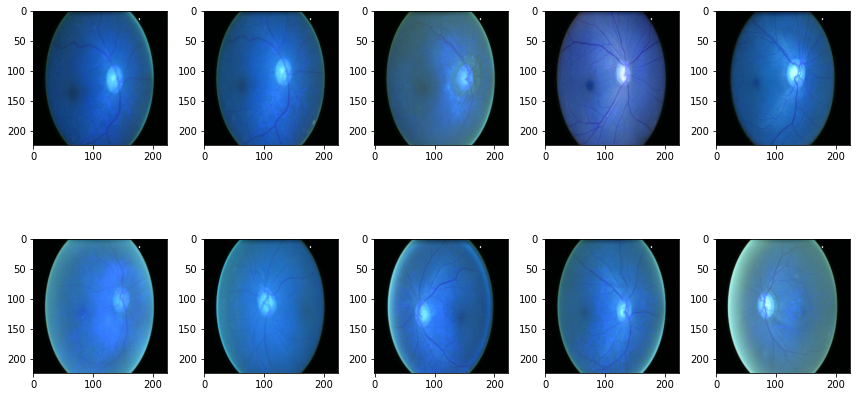

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    #sample = random.choice(range(len(datasetGL)))
    image = image_data2[i]
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    #plt.xlabel(label)
plt.tight_layout() 

##Merge Glaucoma

In [124]:
print(image_data1.shape)
print(image_data2.shape)

(613, 224, 224, 3)
(168, 224, 224, 3)


In [125]:
glaucoma_images = np.concatenate((image_data1, image_data2), axis=0)
glaucoma_images.shape

(781, 224, 224, 3)

#Cataract

##Kaggle

In [28]:
path = 'Datasets/Kaggle/preprocessed_images'
image_data1 = read_images(path,cat_file_names)
image_data1.shape

100%|██████████| 594/594 [00:03<00:00, 197.66it/s]


(588, 224, 224, 3)

##Kaggle2

In [85]:
path = 'Datasets/Kaggle2/2_cataract'
image_data2 = read_images(path,file_names)
image_data2.shape

100%|██████████| 100/100 [00:08<00:00, 11.51it/s]


(100, 224, 224, 3)

##Merge Datasets


In [86]:
print(image_data1.shape)
print(image_data2.shape)

(588, 224, 224, 3)
(100, 224, 224, 3)


In [88]:
cataract_images = np.concatenate((image_data1, image_data2), axis=0)
cataract_images.shape

(688, 224, 224, 3)

#Diabetic Retinopathy